In [379]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [380]:
df = pd.read_csv('cardiovascular_clusters_sin_nocorr.csv', delimiter=',')
df.head()

,sbp,ldl,adiposity,typea,alcohol,age,chd,tabaco_anual,famhist_Absent,famhist_Present,cluster
0,160,5.73,23.11,49,97.20,52,1,0.324324,False,True,0
1,144,4.41,28.61,55,2.06,63,1,0.000208,True,False,0
2,118,3.48,32.28,52,3.81,46,0,0.002581,False,True,1
3,170,6.41,38.03,51,24.26,58,1,0.174419,False,True,0
4,134,3.50,27.78,60,57.34,49,1,0.400000,False,True,1


In [381]:
df.cluster.value_counts()

cluster
1    166
3    156
0    108
2     32
Name: count, dtype: int64

#Modelos para cluster 1 y 2

In [382]:

#X = df.drop(['chd','obesity','tobacco'],axis=1)
#X = df.drop(['chd'],axis=1)
#X = df.drop(['chd','alcohol_over_median','tabaco_over_median','age_over_median','ldl_over_median','adiposity_over_median','sbp_over_median'], axis=1)

#X = df[['alcohol_over_median','tabaco_over_median','age_over_median','ldl_over_median','adiposity_over_median','sbp_over_median']]



df_c13 = df[ (df['cluster']==1 )| (df['cluster']==2)]
df_c13

,sbp,ldl,adiposity,typea,alcohol,age,chd,tabaco_anual,famhist_Absent,famhist_Present,cluster
2,118,3.48,32.28,52,3.81,46,0,0.002581,False,True,1
4,134,3.50,27.78,60,57.34,49,1,0.400000,False,True,1
5,132,6.47,36.21,62,14.14,45,0,0.206667,False,True,1
7,114,4.59,14.60,62,6.72,58,1,0.094884,False,True,1
9,132,5.80,30.96,69,0.00,53,1,0.000000,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...
457,214,5.98,31.72,64,0.00,58,0,0.009302,True,False,2
458,182,4.41,32.10,52,18.72,52,1,0.113514,True,False,2
459,108,1.59,15.23,40,26.64,55,0,0.075000,True,False,1
460,118,11.61,30.79,64,23.97,40,0,0.216000,True,False,1


In [383]:
X = df_c13.drop(['chd','cluster'], axis=1)
y= df_c13['chd']
X

,sbp,ldl,adiposity,typea,alcohol,age,tabaco_anual,famhist_Absent,famhist_Present
2,118,3.48,32.28,52,3.81,46,0.002581,False,True
4,134,3.50,27.78,60,57.34,49,0.400000,False,True
5,132,6.47,36.21,62,14.14,45,0.206667,False,True
7,114,4.59,14.60,62,6.72,58,0.094884,False,True
9,132,5.80,30.96,69,0.00,53,0.000000,False,True
...,...,...,...,...,...,...,...,...,...
457,214,5.98,31.72,64,0.00,58,0.009302,True,False
458,182,4.41,32.10,52,18.72,52,0.113514,True,False
459,108,1.59,15.23,40,26.64,55,0.075000,True,False
460,118,11.61,30.79,64,23.97,40,0.216000,True,False


In [384]:
X["sbp"].count()

198

In [385]:
#Normalizamos con standarscaler - escala entre 0 y variacion estandars
#scaler = StandardScaler()
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.09090909, 0.17421603, 0.66147215, ..., 0.00363937, 0.        ,
        1.        ],
       [0.23636364, 0.17560976, 0.5122679 , ..., 0.56410256, 0.        ,
        1.        ],
       [0.21818182, 0.3825784 , 0.79177719, ..., 0.29145299, 0.        ,
        1.        ],
       ...,
       [0.        , 0.04250871, 0.09615385, ..., 0.10576923, 1.        ,
        0.        ],
       [0.09090909, 0.74076655, 0.61206897, ..., 0.30461538, 1.        ,
        0.        ],
       [0.21818182, 0.26759582, 0.69893899, ..., 0.        , 0.        ,
        1.        ]])

<Axes: >

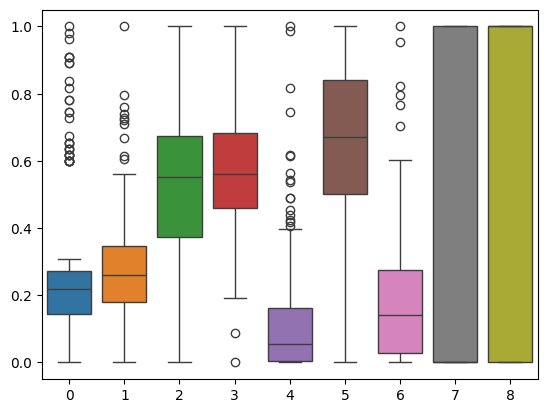

In [386]:
sns.boxplot(X)

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=270724)
X_train.shape

(158, 9)

In [388]:
X_test.shape

(40, 9)

#Reg. Logistica

In [389]:
# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# Validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [390]:
# Evaluar el modelo
y_pred = model.predict(X_test)

In [391]:
# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report sin SMOTE:')
print(class_report)

# Resultados de validación cruzada
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.68
Confusion Matrix:
[[13  6]
 [ 7 14]]
Classification Report sin SMOTE:
              precision    recall  f1-score   support

           0       0.65      0.68      0.67        19
           1       0.70      0.67      0.68        21

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.68        40

Cross-validation accuracy scores: [0.5        0.5        0.75       0.6875     0.5        0.75
 0.5625     0.625      0.93333333 0.4       ]
Mean cross-validation accuracy: 0.62


#con SMOTE

In [392]:
smote = SMOTE(random_state=270724)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [393]:
X_train_res.shape

(172, 9)

In [394]:
y_train_res.shape

(172,)

In [395]:
# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# Validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=cv, scoring='accuracy')
# Entrenar el modelo
model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [396]:
# Evaluar el modelo
y_pred = model.predict(X_test)
# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report con SMOTE:')
print(class_report)

# Resultados de validación cruzada
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.62
Confusion Matrix:
[[10  9]
 [ 6 15]]
Classification Report con SMOTE:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        19
           1       0.62      0.71      0.67        21

    accuracy                           0.62        40
   macro avg       0.62      0.62      0.62        40
weighted avg       0.62      0.62      0.62        40

Cross-validation accuracy scores: [0.66666667 0.55555556 0.70588235 0.35294118 0.41176471 0.64705882
 0.76470588 0.64705882 0.52941176 0.58823529]
Mean cross-validation accuracy: 0.59


In [397]:
X_train.shape

(158, 9)

In [398]:
X_train_res.shape

(172, 9)

# con mejor modelo

In [399]:
# Usamos GridSearchCV para encontrar los mejores hiperparámetros para el modelo de RL.

# Hiperparámetros para buscar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],

}

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=cv, scoring='accuracy')

# Configurar GridSearchCV
grid_search = GridSearchCV(model,
                           param_grid,
                           cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                           scoring='accuracy')


# Entrenar el modelo
grid_search.fit(X_train_res, y_train_res)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=1, max_iter=1000)

In [400]:
# Evaluar el mejor modelo de regresión logística
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report con SMOTE y best model:')
print(class_report)

Logistic Regression Accuracy: 0.62
Confusion Matrix:
[[10  9]
 [ 6 15]]
Classification Report con SMOTE y best model:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        19
           1       0.62      0.71      0.67        21

    accuracy                           0.62        40
   macro avg       0.62      0.62      0.62        40
weighted avg       0.62      0.62      0.62        40



In [401]:
X_train.shape

(158, 9)

In [402]:
X_train_res.shape

(172, 9)

Resultado sigue siendo malo, tendriamos que probar modificando hiperparametros

#SVM


In [403]:
#svm_rbf = SVC ( kernel='rbf', random_state=270224)
#svm_rbf = SVC (kernel='poly', random_state=270224)

svm_rbf = SVC ( kernel='sigmoid', random_state=270224)

In [404]:
param_grid_rbf = {
    'C': [0.1, 1, 10, 25, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [405]:
grid_search_rbf = GridSearchCV(svm_rbf,
                               param_grid_rbf,
                               cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                               scoring = 'accuracy',
                               verbose = 1,
                               n_jobs=-1)

In [406]:
#grid_search_rbf.fit(X_train_res,y_train_res)
grid_search_rbf.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=270224, shuffle=True),
             estimator=SVC(kernel='sigmoid', random_state=270224), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 25, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=1)

In [407]:
best_rbf = grid_search_rbf.best_estimator_
best_rbf

SVC(C=25, gamma=0.1, kernel='sigmoid', random_state=270224)

In [408]:
y_pred=best_rbf.predict(X_test)

In [409]:
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

SVM Regression Accuracy: 0.60
Confusion Matrix:
[[ 9 10]
 [ 6 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        19
           1       0.60      0.71      0.65        21

    accuracy                           0.60        40
   macro avg       0.60      0.59      0.59        40
weighted avg       0.60      0.60      0.59        40



In [410]:
X_train.shape

(158, 9)

In [411]:
X_train_res.shape

(172, 9)

#Red neuronal

In [412]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [413]:
y_test[:7]

371    0
341    1
179    0
208    0
50     0
184    1
157    0
Name: chd, dtype: int64

In [414]:
y_train[:10]

313    0
191    1
14     0
189    1
65     0
384    0
423    1
232    1
355    1
245    0
Name: chd, dtype: int64

In [415]:
X_test[:5]

array([[0.21818182, 0.34773519, 0.44429708, 0.80701754, 0.98709151,
        0.39473684, 0.32544379, 0.        , 1.        ],
       [0.07272727, 0.42090592, 0.25397878, 0.84210526, 0.        ,
        0.68421053, 0.16313236, 0.        , 1.        ],
       [0.        , 0.2738676 , 0.74005305, 0.36842105, 0.09783273,
        0.78947368, 0.51594747, 1.        , 0.        ],
       [0.25454545, 0.34285714, 0.50464191, 0.78947368, 0.09783273,
        0.86842105, 0.18589744, 1.        , 0.        ],
       [0.12727273, 0.33240418, 0.61571618, 0.45614035, 0.02792309,
        0.42105263, 0.        , 0.        , 1.        ]])

In [416]:
y_test[:5]

371    0
341    1
179    0
208    0
50     0
Name: chd, dtype: int64

In [417]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(158, 9)
(158,)
(40, 9)
(40,)


In [418]:
num_neuronas = X_train.shape[1]
num_neuronas_salida=1 # ha de ser uno de salida #len(df["chd"].unique())
print(f"1 capa:{num_neuronas} salida: {num_neuronas_salida}")

1 capa:9 salida: 1


In [419]:
# Modelo inicial de 9, 3 capas intermedia de 9 neuronas y salida de 1 neurona con relu sin dropout
#Si funciona: 1 - ( 0.35)-2 ( 0.3) - 3 (0.2)- 4 - 5

model = Sequential()
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) # softmax
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [420]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)

In [421]:
model.fit(x=X_train,
          y=y_train,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
        ,          callbacks=[early_stop]
          )

Epoch 1/800
4/4 [==============================] - 2s 130ms/step - loss: 0.2520 - accuracy: 0.5127 - val_loss: 0.2507 - val_accuracy: 0.4750
Epoch 2/800
4/4 [==============================] - 0s 26ms/step - loss: 0.2574 - accuracy: 0.4810 - val_loss: 0.2501 - val_accuracy: 0.4750
Epoch 3/800
4/4 [==============================] - 0s 33ms/step - loss: 0.2500 - accuracy: 0.4937 - val_loss: 0.2496 - val_accuracy: 0.4750
Epoch 4/800
4/4 [==============================] - 0s 30ms/step - loss: 0.2510 - accuracy: 0.5949 - val_loss: 0.2493 - val_accuracy: 0.4750
Epoch 5/800
4/4 [==============================] - 0s 27ms/step - loss: 0.2489 - accuracy: 0.5570 - val_loss: 0.2491 - val_accuracy: 0.4750
Epoch 6/800
4/4 [==============================] - 0s 25ms/step - loss: 0.2487 - accuracy: 0.5000 - val_loss: 0.2489 - val_accuracy: 0.4750
Epoch 7/800
4/4 [==============================] - 0s 25ms/step - loss: 0.2516 - accuracy: 0.5570 - val_loss: 0.2489 - val_accuracy: 0.4750
Epoch 8/800
4/4 [==

<Axes: >

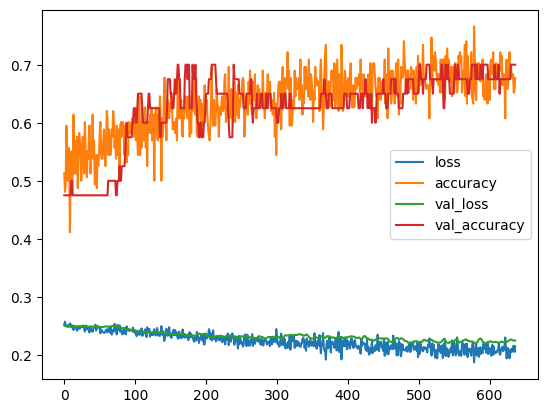

In [422]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [423]:
predictions = model.predict(X_test)
predictions[:5]

2/2 [==============================] - 0s 7ms/step


array([[0.43238336],
       [0.50069153],
       [0.45178282],
       [0.322513  ],
       [0.3199287 ]], dtype=float32)

In [424]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [425]:
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report sin SMOTE:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[16  3]
 [ 9 12]]

Classification Report sin SMOTE:
               precision    recall  f1-score   support

           0       0.64      0.84      0.73        19
           1       0.80      0.57      0.67        21

    accuracy                           0.70        40
   macro avg       0.72      0.71      0.70        40
weighted avg       0.72      0.70      0.70        40


Accuracy:
 0.7


con SMOTE

---



In [426]:

model = Sequential()
#model.add(Dense(units = int(num_neuronas),activation='relu')) #relu
#model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) #   softmax
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [427]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)

In [428]:
#con SMOTE
model.fit(x=X_train_res,
          y=y_train_res,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
        ,          callbacks=[early_stop]
          )

Epoch 1/800
4/4 [==============================] - 2s 102ms/step - loss: 0.2567 - accuracy: 0.5174 - val_loss: 0.2538 - val_accuracy: 0.5000
Epoch 2/800
4/4 [==============================] - 0s 24ms/step - loss: 0.2536 - accuracy: 0.5058 - val_loss: 0.2527 - val_accuracy: 0.5750
Epoch 3/800
4/4 [==============================] - 0s 25ms/step - loss: 0.2533 - accuracy: 0.4942 - val_loss: 0.2521 - val_accuracy: 0.5500
Epoch 4/800
4/4 [==============================] - 0s 23ms/step - loss: 0.2588 - accuracy: 0.4302 - val_loss: 0.2514 - val_accuracy: 0.5750
Epoch 5/800
4/4 [==============================] - 0s 18ms/step - loss: 0.2517 - accuracy: 0.5523 - val_loss: 0.2508 - val_accuracy: 0.5750
Epoch 6/800
4/4 [==============================] - 0s 24ms/step - loss: 0.2484 - accuracy: 0.5640 - val_loss: 0.2502 - val_accuracy: 0.5750
Epoch 7/800
4/4 [==============================] - 0s 25ms/step - loss: 0.2545 - accuracy: 0.4593 - val_loss: 0.2495 - val_accuracy: 0.5750
Epoch 8/800
4/4 [==

<Axes: >

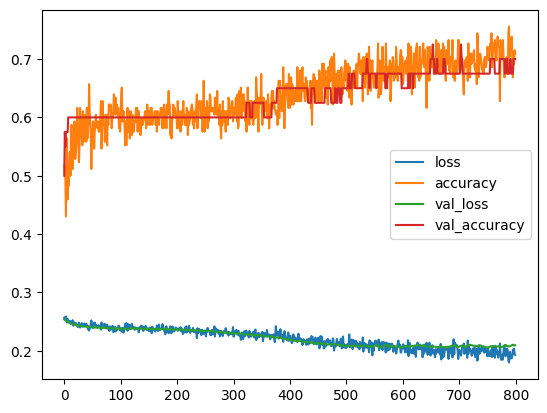

In [429]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [430]:
predictions = model.predict(X_test)
predictions[:5]

2/2 [==============================] - 0s 5ms/step


array([[0.67403686],
       [0.7089801 ],
       [0.4000014 ],
       [0.39392906],
       [0.40433758]], dtype=float32)

In [431]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [432]:
#Resultados
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report con SMOT bool mayor media:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[14  5]
 [ 7 14]]

Classification Report con SMOT bool mayor media:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70        19
           1       0.74      0.67      0.70        21

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40


Accuracy:
 0.7


In [433]:
X_train.shape

(158, 9)

In [434]:
X_train_res.shape

(172, 9)

# Modelos para grupo 0

In [435]:
df2=df[df["cluster"]==0]
df2.head()

,sbp,ldl,adiposity,typea,alcohol,age,chd,tabaco_anual,famhist_Absent,famhist_Present,cluster
0,160,5.73,23.11,49,97.20,52,1,0.324324,False,True,0
1,144,4.41,28.61,55,2.06,63,1,0.000208,True,False,0
3,170,6.41,38.03,51,24.26,58,1,0.174419,False,True,0
17,146,8.29,35.36,78,13.89,53,1,0.276316,False,True,0
18,158,7.46,34.07,61,53.28,62,1,0.055319,False,True,0


In [436]:
X = df2.drop(['chd','cluster'], axis=1)
y = df2['chd']

In [437]:
X[:2]

,sbp,ldl,adiposity,typea,alcohol,age,tabaco_anual,famhist_Absent,famhist_Present
0,160,5.73,23.11,49,97.20,52,0.324324,False,True
1,144,4.41,28.61,55,2.06,63,0.000208,True,False


In [438]:
df2["age"].count()

108

In [439]:
#Normalizamos con standarscaler - escala entre 0 y variacion estandars
#scaler = StandardScaler()
scaler =MinMaxScaler()
X=scaler.fit_transform(X)
X[:2]

array([[6.42857143e-01, 3.22347267e-01, 3.13647821e-01, 5.53846154e-01,
        9.00000000e-01, 7.39130435e-01, 5.62162162e-01, 0.00000000e+00,
        1.00000000e+00],
       [7.14285714e-02, 2.16237942e-01, 5.11703277e-01, 6.46153846e-01,
        1.90740741e-02, 9.78260870e-01, 3.61111111e-04, 1.00000000e+00,
        0.00000000e+00]])

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=270724)
X_train.shape

(86, 9)

In [441]:
X_test.shape

(22, 9)

### Reg Logistica

Sin SMOTE

In [442]:
# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# Validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [443]:
# Evaluar el modelo
y_pred = model.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report age sin SMOTE:')
print(class_report)

# Resultados de validación cruzada
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.55
Confusion Matrix:
[[10  2]
 [ 8  2]]
Classification Report age sin SMOTE:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67        12
           1       0.50      0.20      0.29        10

    accuracy                           0.55        22
   macro avg       0.53      0.52      0.48        22
weighted avg       0.53      0.55      0.49        22

Cross-validation accuracy scores: [0.44444444 0.88888889 0.66666667 0.77777778 0.44444444 0.77777778
 0.625      0.625      0.375      0.75      ]
Mean cross-validation accuracy: 0.64


Con SMOTE y best model

In [444]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=270724)

smote = SMOTE(random_state=270724)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Realizar modelo regresión logística
model = LogisticRegression(solver = "lbfgs", max_iter = 1000) # Le aplicamos el modelo lbfgs en particular + cuantas veces queremos entrenar el modelo con los datos
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 270724) # Pedimos que mezcle datos y semilla
cv_score = cross_val_score(model, X_train_res, y_train_res, cv = cv, scoring = 'accuracy') # con métrica accuracy

# Entrenamos modelo
model.fit(X_train_res, y_train_res)
# Predicción de y
y_pred = model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
reporte = classification_report(y_test, y_pred)
print(f"Classification Report ldl con SMOTE : {reporte}")


Accuracy = 0.64
Confusion Matrix:
[[9 3]
 [5 5]]
Classification Report ldl con SMOTE :               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.62      0.50      0.56        10

    accuracy                           0.64        22
   macro avg       0.63      0.62      0.62        22
weighted avg       0.63      0.64      0.63        22



In [445]:
X_train.shape

(86, 9)

In [446]:
X_train_res.shape

(96, 9)

In [447]:
# Data aumentation para simular mas muestra

No hay diferencia si lo hacemos con SMOTE porque solo crea 2 registros,
Coger el más optimo tampoco influye

#SVM

con SMOTE

In [448]:
svm_rbf = SVC ( kernel='sigmoid', random_state=270224)
param_grid_rbf = {
    'C': [0.1, 1, 10, 25, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
grid_search_rbf = GridSearchCV(svm_rbf,
                               param_grid_rbf,
                               cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                               scoring = 'accuracy',
                               verbose = 1,
                               n_jobs=-1)
#grid_search_rbf.fit(X_train_res,y_train_res)
grid_search_rbf.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=270224, shuffle=True),
             estimator=SVC(kernel='sigmoid', random_state=270224), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 25, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=1)

In [449]:
best_rbf = grid_search_rbf.best_estimator_
best_rbf

SVC(C=100, gamma=0.01, kernel='sigmoid', random_state=270224)

In [450]:
y_pred=best_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix age - SVM:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

SVM Regression Accuracy: 0.55
Confusion Matrix age - SVM:
[[10  2]
 [ 8  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67        12
           1       0.50      0.20      0.29        10

    accuracy                           0.55        22
   macro avg       0.53      0.52      0.48        22
weighted avg       0.53      0.55      0.49        22



#Red Neuronal

In [451]:
num_neuronas = X_train.shape[1]
num_neuronas_salida=1 # ha de ser uno de salida #len(df["chd"].unique())
print(f"1 capa:{num_neuronas} salida: {num_neuronas_salida}")

1 capa:9 salida: 1


In [452]:
# Modelo inicial de 3, 3 capas intermedia de 9 neuronas y salida de 1 neurona con relu sin dropout
#Si funciona: 1 - ( 0.35)-2 ( 0.3) - 3 (0.2)- 4 - 5
model = Sequential()
model.add(Dense(units = int(num_neuronas),activation='relu')) #relu
model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) #   softmax
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])


In [453]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)

In [454]:
model.fit(x=X_train,
          y=y_train,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
         ,          callbacks=[early_stop]
          )

Epoch 1/800
2/2 [==============================] - 2s 214ms/step - loss: 0.2465 - accuracy: 0.5814 - val_loss: 0.2518 - val_accuracy: 0.5455
Epoch 2/800
2/2 [==============================] - 0s 37ms/step - loss: 0.2501 - accuracy: 0.5465 - val_loss: 0.2518 - val_accuracy: 0.5455
Epoch 3/800
2/2 [==============================] - 0s 53ms/step - loss: 0.2468 - accuracy: 0.5698 - val_loss: 0.2519 - val_accuracy: 0.5455
Epoch 4/800
2/2 [==============================] - 0s 50ms/step - loss: 0.2470 - accuracy: 0.5465 - val_loss: 0.2518 - val_accuracy: 0.5455
Epoch 5/800
2/2 [==============================] - 0s 32ms/step - loss: 0.2472 - accuracy: 0.5349 - val_loss: 0.2517 - val_accuracy: 0.5455
Epoch 6/800
2/2 [==============================] - 0s 36ms/step - loss: 0.2465 - accuracy: 0.6279 - val_loss: 0.2515 - val_accuracy: 0.5455
Epoch 7/800
2/2 [==============================] - 0s 33ms/step - loss: 0.2485 - accuracy: 0.5465 - val_loss: 0.2513 - val_accuracy: 0.5455
Epoch 8/800
2/2 [==

<Axes: >

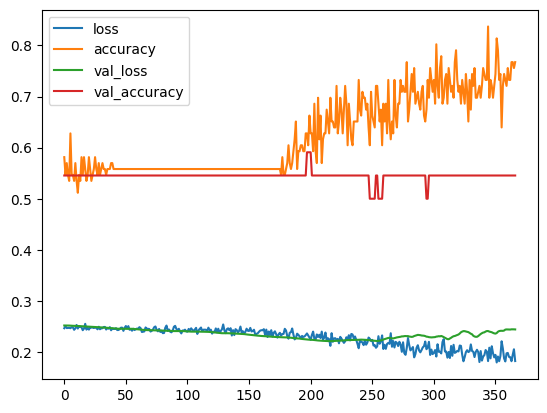

In [455]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [456]:
predictions = model.predict(X_test)
predictions[:5]

1/1 [==============================] - 0s 148ms/step


array([[0.618781  ],
       [0.32151672],
       [0.24986568],
       [0.54796946],
       [0.14039251]], dtype=float32)

In [457]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [458]:
#Resultados
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report con SMOT :\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[10  2]
 [ 8  2]]

Classification Report con SMOT :
               precision    recall  f1-score   support

           0       0.56      0.83      0.67        12
           1       0.50      0.20      0.29        10

    accuracy                           0.55        22
   macro avg       0.53      0.52      0.48        22
weighted avg       0.53      0.55      0.49        22


Accuracy:
 0.5454545454545454


con SMOTE

In [459]:

model = Sequential()
#model.add(Dense(units = int(num_neuronas),activation='relu')) #relu
#model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) #   softmax
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [460]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
#con SMOTE

model.fit(x=X_train_res,
          y=y_train_res,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
        ,          callbacks=[early_stop]
          )

Epoch 1/800
2/2 [==============================] - 2s 325ms/step - loss: 0.2705 - accuracy: 0.4896 - val_loss: 0.2590 - val_accuracy: 0.5455
Epoch 2/800
2/2 [==============================] - 0s 65ms/step - loss: 0.2730 - accuracy: 0.4896 - val_loss: 0.2584 - val_accuracy: 0.5455
Epoch 3/800
2/2 [==============================] - 0s 66ms/step - loss: 0.2695 - accuracy: 0.4792 - val_loss: 0.2578 - val_accuracy: 0.5455
Epoch 4/800
2/2 [==============================] - 0s 77ms/step - loss: 0.2638 - accuracy: 0.5000 - val_loss: 0.2572 - val_accuracy: 0.5455
Epoch 5/800
2/2 [==============================] - 0s 50ms/step - loss: 0.2550 - accuracy: 0.5312 - val_loss: 0.2568 - val_accuracy: 0.5455
Epoch 6/800
2/2 [==============================] - 0s 64ms/step - loss: 0.2574 - accuracy: 0.5000 - val_loss: 0.2564 - val_accuracy: 0.5455
Epoch 7/800
2/2 [==============================] - 0s 65ms/step - loss: 0.2609 - accuracy: 0.4479 - val_loss: 0.2559 - val_accuracy: 0.5455
Epoch 8/800
2/2 [==

<Axes: >

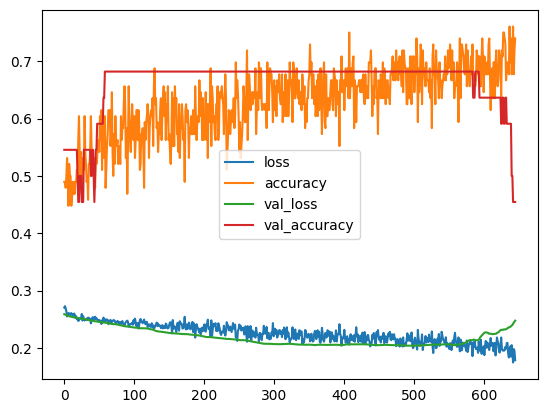

In [461]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [462]:
predictions = model.predict(X_test)
predictions[:5]

1/1 [==============================] - 0s 127ms/step


array([[0.52406335],
       [0.25891572],
       [0.4471391 ],
       [0.6299485 ],
       [0.2883643 ]], dtype=float32)

In [463]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [464]:
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report sin tabaco 10 var originales:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[7 5]
 [7 3]]

Classification Report sin tabaco 10 var originales:
               precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.38      0.30      0.33        10

    accuracy                           0.45        22
   macro avg       0.44      0.44      0.44        22
weighted avg       0.44      0.45      0.45        22


Accuracy:
 0.45454545454545453


##Modelos para grupos 1, 2 y 0

In [465]:
df_c012 = df[ (df['cluster']<3)]
df_c012

,sbp,ldl,adiposity,typea,alcohol,age,chd,tabaco_anual,famhist_Absent,famhist_Present,cluster
0,160,5.73,23.11,49,97.20,52,1,0.324324,False,True,0
1,144,4.41,28.61,55,2.06,63,1,0.000208,True,False,0
2,118,3.48,32.28,52,3.81,46,0,0.002581,False,True,1
3,170,6.41,38.03,51,24.26,58,1,0.174419,False,True,0
4,134,3.50,27.78,60,57.34,49,1,0.400000,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...
457,214,5.98,31.72,64,0.00,58,0,0.009302,True,False,2
458,182,4.41,32.10,52,18.72,52,1,0.113514,True,False,2
459,108,1.59,15.23,40,26.64,55,0,0.075000,True,False,1
460,118,11.61,30.79,64,23.97,40,0,0.216000,True,False,1


In [466]:
df_c012['ldl'].count()

306

In [467]:
df_c012['chd'].value_counts()

chd
0    165
1    141
Name: count, dtype: int64

In [468]:
X = df_c012.drop(['chd','cluster'], axis=1)
y = df_c012['chd']

In [469]:
X.shape

(306, 9)

In [470]:
#Normalizamos con standarscaler - escala entre 0 y variacion estandars
#scaler = StandardScaler()
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[4.72727273e-01, 3.31010453e-01, 3.57427056e-01, ...,
        4.57380457e-01, 0.00000000e+00, 1.00000000e+00],
       [3.27272727e-01, 2.39024390e-01, 5.39787798e-01, ...,
        2.93803419e-04, 1.00000000e+00, 0.00000000e+00],
       [9.09090909e-02, 1.74216028e-01, 6.61472149e-01, ...,
        3.63937138e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 4.25087108e-02, 9.61538462e-02, ...,
        1.05769231e-01, 1.00000000e+00, 0.00000000e+00],
       [9.09090909e-02, 7.40766551e-01, 6.12068966e-01, ...,
        3.04615385e-01, 1.00000000e+00, 0.00000000e+00],
       [2.18181818e-01, 2.67595819e-01, 6.98938992e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# Reg Logistica

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=270724)
X_train.shape

(244, 9)

sin SMOTE

In [472]:
# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# Validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [473]:
# Evaluar el modelo
y_pred = model.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report Report sdb sin SMOTE:')
print(class_report)

# Resultados de validación cruzada
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.74
Confusion Matrix:
[[31  6]
 [10 15]]
Classification Report Report sdb sin SMOTE:
              precision    recall  f1-score   support

           0       0.76      0.84      0.79        37
           1       0.71      0.60      0.65        25

    accuracy                           0.74        62
   macro avg       0.74      0.72      0.72        62
weighted avg       0.74      0.74      0.74        62

Cross-validation accuracy scores: [0.72       0.72       0.56       0.4        0.54166667 0.66666667
 0.41666667 0.58333333 0.66666667 0.625     ]
Mean cross-validation accuracy: 0.59


Con SMOTE y best Model

In [474]:
# Usamos GridSearchCV para encontrar los mejores hiperparámetros para el modelo de RL.

# Hiperparámetros para buscar
param_grid = {
    'C': [  20,25,35,35.5,36,37,38,39,40],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],

}

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=2000)


# Validación cruzada
#cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
#cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=cv, scoring='accuracy')

# Configurar GridSearchCV
grid_search = GridSearchCV(model,
                           param_grid,
                           cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                           scoring='accuracy')


# Entrenar el modelo
grid_search.fit(X_train_res, y_train_res)


# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print(best_model.solver)
best_model


lbfgs


LogisticRegression(C=20, max_iter=2000)

In [475]:
# Evaluar el mejor modelo de regresión logística
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Logistic Regression Accuracy: 0.68
Confusion Matrix:
[[28  9]
 [11 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        37
           1       0.61      0.56      0.58        25

    accuracy                           0.68        62
   macro avg       0.66      0.66      0.66        62
weighted avg       0.67      0.68      0.67        62



In [476]:
X_train.shape

(244, 9)

In [477]:
X_train_res.shape

(96, 9)

In [478]:
X_train.shape

(244, 9)

In [479]:
X_train_res.shape

(96, 9)

Con MaxScaler mejoramos accuracy y matriz de confusion

#SVM

sin SMOTE

In [480]:
svm_rbf = SVC ( kernel='sigmoid', random_state=270224)
param_grid_rbf = {
    'C': [0.1, 1, 10, 25, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
grid_search_rbf = GridSearchCV(svm_rbf,
                               param_grid_rbf,
                               cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                               scoring = 'accuracy',
                               verbose = 1,
                               n_jobs=-1)
grid_search_rbf.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=270224, shuffle=True),
             estimator=SVC(kernel='sigmoid', random_state=270224), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 25, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=1)

In [481]:
best_rbf = grid_search_rbf.best_estimator_
best_rbf

SVC(C=25, gamma=0.1, kernel='sigmoid', random_state=270224)

In [482]:
y_pred=best_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix age - LDL:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report age - LDL sin SMOTE:')
print(class_report)

SVM Regression Accuracy: 0.73
Confusion Matrix age - LDL:
[[27 10]
 [ 7 18]]
Classification Report age - LDL sin SMOTE:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        37
           1       0.64      0.72      0.68        25

    accuracy                           0.73        62
   macro avg       0.72      0.72      0.72        62
weighted avg       0.73      0.73      0.73        62



In [483]:
svm_rbf = SVC ( kernel='sigmoid', random_state=270224)
param_grid_rbf = {
    'C': [0.1, 1, 10, 25, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
grid_search_rbf = GridSearchCV(svm_rbf,
                               param_grid_rbf,
                               cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                               scoring = 'accuracy',
                               verbose = 1,
                               n_jobs=-1)
grid_search_rbf.fit(X_train_res,y_train_res)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=270224, shuffle=True),
             estimator=SVC(kernel='sigmoid', random_state=270224), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 25, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=1)

In [484]:
best_rbf = grid_search_rbf.best_estimator_
best_rbf

SVC(C=100, gamma=0.01, kernel='sigmoid', random_state=270224)

In [485]:
y_pred=best_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix age - LDL:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report age - LDL:')
print(class_report)

SVM Regression Accuracy: 0.69
Confusion Matrix age - LDL:
[[26 11]
 [ 8 17]]
Classification Report age - LDL:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        37
           1       0.61      0.68      0.64        25

    accuracy                           0.69        62
   macro avg       0.69      0.69      0.69        62
weighted avg       0.70      0.69      0.70        62



##Neuronal

In [486]:
num_neuronas = X_train.shape[1]
num_neuronas_salida=1 # ha de ser uno de salida #len(df["chd"].unique())
print(f"1 capa:{num_neuronas} salida: {num_neuronas_salida}")

1 capa:9 salida: 1


In [487]:
# Modelo inicial de 9, 3 capas intermedia de 9 neuronas y salida de 1 neurona con relu sin dropout
#Si funciona: 1 - ( 0.35)-2 ( 0.3) - 3 (0.2)- 4 - 5

model = Sequential()
model.add(Dense(units = int(num_neuronas),activation='relu')) #relu

model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = int(num_neuronas),activation='relu'))

model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) #  softmax

model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])


In [488]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

In [489]:
model.fit(x=X_train,
          y=y_train,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
        ,          callbacks=[early_stop]
          )

Epoch 1/800
5/5 [==============================] - 2s 68ms/step - loss: 0.2501 - accuracy: 0.4713 - val_loss: 0.2483 - val_accuracy: 0.5806
Epoch 2/800
5/5 [==============================] - 0s 16ms/step - loss: 0.2496 - accuracy: 0.4836 - val_loss: 0.2473 - val_accuracy: 0.5968
Epoch 3/800
5/5 [==============================] - 0s 18ms/step - loss: 0.2491 - accuracy: 0.5000 - val_loss: 0.2466 - val_accuracy: 0.6613
Epoch 4/800
5/5 [==============================] - 0s 12ms/step - loss: 0.2530 - accuracy: 0.5082 - val_loss: 0.2459 - val_accuracy: 0.5968
Epoch 5/800
5/5 [==============================] - 0s 16ms/step - loss: 0.2541 - accuracy: 0.5123 - val_loss: 0.2457 - val_accuracy: 0.5968
Epoch 6/800
5/5 [==============================] - 0s 13ms/step - loss: 0.2545 - accuracy: 0.4713 - val_loss: 0.2455 - val_accuracy: 0.5968
Epoch 7/800
5/5 [==============================] - 0s 16ms/step - loss: 0.2509 - accuracy: 0.5328 - val_loss: 0.2452 - val_accuracy: 0.5968
Epoch 8/800
5/5 [===

<Axes: >

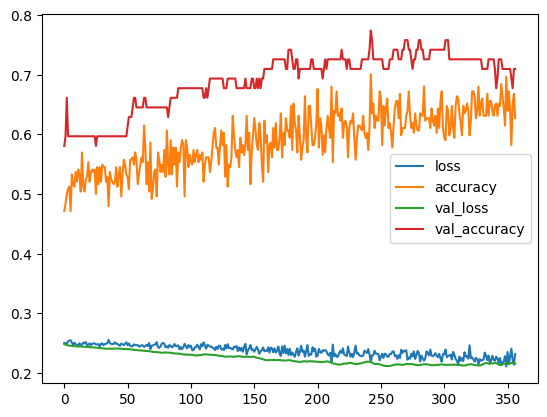

In [490]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [491]:
predictions = model.predict(X_test)
predictions[:5]

2/2 [==============================] - 0s 7ms/step


array([[0.6251327 ],
       [0.68897295],
       [0.43330362],
       [0.58351475],
       [0.5666734 ]], dtype=float32)

In [492]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [493]:
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report sin SMOT 10 var originales:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[28  9]
 [ 9 16]]

Classification Report sin SMOT 10 var originales:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        37
           1       0.64      0.64      0.64        25

    accuracy                           0.71        62
   macro avg       0.70      0.70      0.70        62
weighted avg       0.71      0.71      0.71        62


Accuracy:
 0.7096774193548387


# Con SMOTE

In [494]:
# Modelo inicial de 9, 3 capas intermedia de 9 neuronas y salida de 1 neurona con relu sin dropout
#Si funciona: 1 - ( 0.35)-2 ( 0.3) - 3 (0.2)- 4 - 5

model = Sequential()
model.add(Dense(units = int(num_neuronas),activation='relu')) #relu
model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) #   softmax
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [495]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
#con SMOTE
model.fit(x=X_train_res,
          y=y_train_res,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
        ,          callbacks=[early_stop]
          )

Epoch 1/800
2/2 [==============================] - 2s 270ms/step - loss: 0.2488 - accuracy: 0.5208 - val_loss: 0.2615 - val_accuracy: 0.4032
Epoch 2/800
2/2 [==============================] - 0s 54ms/step - loss: 0.2520 - accuracy: 0.4792 - val_loss: 0.2611 - val_accuracy: 0.4032
Epoch 3/800
2/2 [==============================] - 0s 41ms/step - loss: 0.2499 - accuracy: 0.5521 - val_loss: 0.2606 - val_accuracy: 0.4032
Epoch 4/800
2/2 [==============================] - 0s 57ms/step - loss: 0.2567 - accuracy: 0.4896 - val_loss: 0.2601 - val_accuracy: 0.4032
Epoch 5/800
2/2 [==============================] - 0s 48ms/step - loss: 0.2479 - accuracy: 0.5208 - val_loss: 0.2596 - val_accuracy: 0.4032
Epoch 6/800
2/2 [==============================] - 0s 41ms/step - loss: 0.2476 - accuracy: 0.4792 - val_loss: 0.2590 - val_accuracy: 0.4032
Epoch 7/800
2/2 [==============================] - 0s 56ms/step - loss: 0.2577 - accuracy: 0.5000 - val_loss: 0.2584 - val_accuracy: 0.4032
Epoch 8/800
2/2 [==

<Axes: >

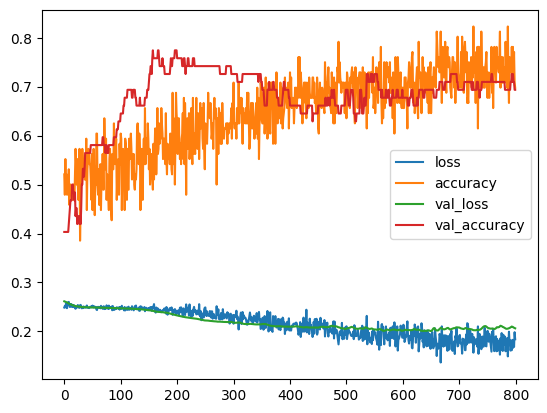

In [496]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [497]:
predictions = model.predict(X_test)
predictions[:5]

2/2 [==============================] - 0s 8ms/step


array([[0.8387414 ],
       [0.62753135],
       [0.74693924],
       [0.28382236],
       [0.62952924]], dtype=float32)

In [498]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [499]:
#Resultados
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report con SMOT 10 var originales:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[29  8]
 [11 14]]

Classification Report con SMOT 10 var originales:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        37
           1       0.64      0.56      0.60        25

    accuracy                           0.69        62
   macro avg       0.68      0.67      0.67        62
weighted avg       0.69      0.69      0.69        62


Accuracy:
 0.6935483870967742


#Modelos 2 y 0

In [500]:
#Coger modelo 2 y 0

In [501]:
df23=df[(df['cluster']==2 )| (df['cluster']==0 )]
df23.head()

,sbp,ldl,adiposity,typea,alcohol,age,chd,tabaco_anual,famhist_Absent,famhist_Present,cluster
0,160,5.73,23.11,49,97.20,52,1,0.324324,False,True,0
1,144,4.41,28.61,55,2.06,63,1,0.000208,True,False,0
3,170,6.41,38.03,51,24.26,58,1,0.174419,False,True,0
10,206,2.95,32.27,72,56.06,60,1,0.133333,True,False,2
17,146,8.29,35.36,78,13.89,53,1,0.276316,False,True,0


In [502]:
X = df23.drop(['chd','cluster'], axis=1)
y = df23['chd']

In [503]:
y.value_counts()

chd
0    73
1    67
Name: count, dtype: int64

In [504]:
#Normalizamos con standarscaler - escala entre 0 y variacion estandars
#scaler = StandardScaler()
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
X[:2]

array([[2.36842105e-01, 3.22347267e-01, 3.13647821e-01, 5.53846154e-01,
        9.00000000e-01, 7.39130435e-01, 5.56322746e-01, 0.00000000e+00,
        1.00000000e+00],
       [2.63157895e-02, 2.16237942e-01, 5.11703277e-01, 6.46153846e-01,
        1.90740741e-02, 9.78260870e-01, 3.57360097e-04, 1.00000000e+00,
        0.00000000e+00]])

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=270724)

In [506]:
# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# Validación cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270724)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [507]:
# Evaluar el modelo
y_pred = model.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print('Classification Report Report 3 var sin SMOTE:')
print(class_report)

# Resultados de validación cruzada
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.68
Confusion Matrix:
[[ 9  2]
 [ 7 10]]
Classification Report Report 3 var sin SMOTE:
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.83      0.59      0.69        17

    accuracy                           0.68        28
   macro avg       0.70      0.70      0.68        28
weighted avg       0.73      0.68      0.68        28

Cross-validation accuracy scores: [0.66666667 0.66666667 0.63636364 0.63636364 0.72727273 0.63636364
 0.81818182 0.54545455 0.90909091 0.54545455]
Mean cross-validation accuracy: 0.68


#SVM

In [508]:
#svm_rbf = SVC ( kernel='rbf', random_state=270224)
#svm_rbf = SVC (kernel='poly', random_state=270224)

svm_rbf = SVC ( kernel='sigmoid', random_state=270224)

In [509]:
param_grid_rbf = {
    'C': [0.1, 1, 10, 25, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [510]:
grid_search_rbf = GridSearchCV(svm_rbf,
                               param_grid_rbf,
                               cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=270224),
                               scoring = 'accuracy',
                               verbose = 1,
                               n_jobs=-1)

In [511]:
#grid_search_rbf.fit(X_train_res,y_train_res)
grid_search_rbf.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=270224, shuffle=True),
             estimator=SVC(kernel='sigmoid', random_state=270224), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 25, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=1)

In [512]:
best_rbf = grid_search_rbf.best_estimator_
best_rbf

SVC(C=10, gamma=0.1, kernel='sigmoid', random_state=270224)

In [513]:
y_pred=best_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Regression Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

SVM Regression Accuracy: 0.61
Confusion Matrix:
[[8 3]
 [8 9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.73      0.59        11
           1       0.75      0.53      0.62        17

    accuracy                           0.61        28
   macro avg       0.62      0.63      0.61        28
weighted avg       0.65      0.61      0.61        28



In [514]:
X_train.shape

(112, 9)

In [515]:
X_train_res.shape

(96, 9)

#Red neuronal

In [516]:
y_test[:5]

186    0
392    0
318    1
389    1
83     1
Name: chd, dtype: int64

In [517]:
num_neuronas = X_train.shape[1]
num_neuronas_salida=1 # ha de ser uno de salida #len(df["chd"].unique())
print(f"1 capa:{num_neuronas} salida: {num_neuronas_salida}")

1 capa:9 salida: 1


In [518]:
# Modelo inicial de 9, 3 capas intermedia de 9 neuronas y salida de 1 neurona con relu sin dropout
#Si funciona: 1 - ( 0.35)-2 ( 0.3) - 3 (0.2)- 4 - 5

model = Sequential()
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) # softmax
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [519]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)

In [520]:
model.fit(x=X_train,
          y=y_train,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
        ,          callbacks=[early_stop]
          )

Epoch 1/800
3/3 [==============================] - 2s 127ms/step - loss: 0.2600 - accuracy: 0.5714 - val_loss: 0.2590 - val_accuracy: 0.3929
Epoch 2/800
3/3 [==============================] - 0s 23ms/step - loss: 0.2483 - accuracy: 0.5089 - val_loss: 0.2590 - val_accuracy: 0.3929
Epoch 3/800
3/3 [==============================] - 0s 33ms/step - loss: 0.2550 - accuracy: 0.5446 - val_loss: 0.2587 - val_accuracy: 0.3929
Epoch 4/800
3/3 [==============================] - 0s 36ms/step - loss: 0.2536 - accuracy: 0.5357 - val_loss: 0.2582 - val_accuracy: 0.3929
Epoch 5/800
3/3 [==============================] - 0s 20ms/step - loss: 0.2553 - accuracy: 0.4554 - val_loss: 0.2576 - val_accuracy: 0.3929
Epoch 6/800
3/3 [==============================] - 0s 22ms/step - loss: 0.2523 - accuracy: 0.5357 - val_loss: 0.2565 - val_accuracy: 0.3929
Epoch 7/800
3/3 [==============================] - 0s 22ms/step - loss: 0.2534 - accuracy: 0.5982 - val_loss: 0.2552 - val_accuracy: 0.3929
Epoch 8/800
3/3 [==

<Axes: >

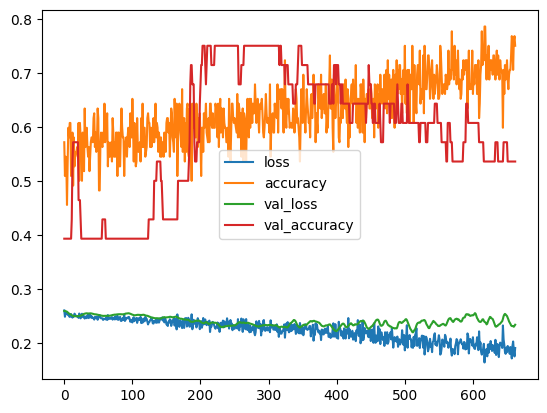

In [521]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [522]:
predictions = model.predict(X_test)
predictions[:5]

1/1 [==============================] - 0s 96ms/step


array([[0.5537436 ],
       [0.32839608],
       [0.56098765],
       [0.3596944 ],
       [0.3536064 ]], dtype=float32)

In [523]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [524]:
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report sin SMOTE:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[ 8  3]
 [10  7]]

Classification Report sin SMOTE:
               precision    recall  f1-score   support

           0       0.44      0.73      0.55        11
           1       0.70      0.41      0.52        17

    accuracy                           0.54        28
   macro avg       0.57      0.57      0.54        28
weighted avg       0.60      0.54      0.53        28


Accuracy:
 0.5357142857142857


con SMOTE

In [525]:
# Modelo inicial de 9, 3 capas intermedia de 9 neuronas y salida de 1 neurona con relu sin dropout
#Si funciona: 1 - ( 0.35)-2 ( 0.3) - 3 (0.2)- 4 - 5

model = Sequential()
model.add(Dense(units = int(num_neuronas),activation='relu')) #relu
model.add(Dropout(0.35))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dense(units = int(num_neuronas_salida),activation='hard_sigmoid')) #   softmax
model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['binary_accuracy'])

In [526]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
#con SMOTE
model.fit(x=X_train_res,
          y=y_train_res,
          epochs=800,
          batch_size=50,
          validation_data=(X_test, y_test), verbose=1
        ,          callbacks=[early_stop]
          )

Epoch 1/800
2/2 [==============================] - 3s 255ms/step - loss: 0.2489 - accuracy: 0.4583 - val_loss: 0.2456 - val_accuracy: 0.3571
Epoch 2/800
2/2 [==============================] - 0s 57ms/step - loss: 0.2421 - accuracy: 0.5833 - val_loss: 0.2452 - val_accuracy: 0.4643
Epoch 3/800
2/2 [==============================] - 0s 59ms/step - loss: 0.2414 - accuracy: 0.4583 - val_loss: 0.2449 - val_accuracy: 0.5000
Epoch 4/800
2/2 [==============================] - 0s 55ms/step - loss: 0.2478 - accuracy: 0.5000 - val_loss: 0.2448 - val_accuracy: 0.5357
Epoch 5/800
2/2 [==============================] - 0s 49ms/step - loss: 0.2502 - accuracy: 0.4896 - val_loss: 0.2448 - val_accuracy: 0.5714
Epoch 6/800
2/2 [==============================] - 0s 50ms/step - loss: 0.2431 - accuracy: 0.5000 - val_loss: 0.2446 - val_accuracy: 0.6071
Epoch 7/800
2/2 [==============================] - 0s 38ms/step - loss: 0.2402 - accuracy: 0.5208 - val_loss: 0.2445 - val_accuracy: 0.6071
Epoch 8/800
2/2 [==

<Axes: >

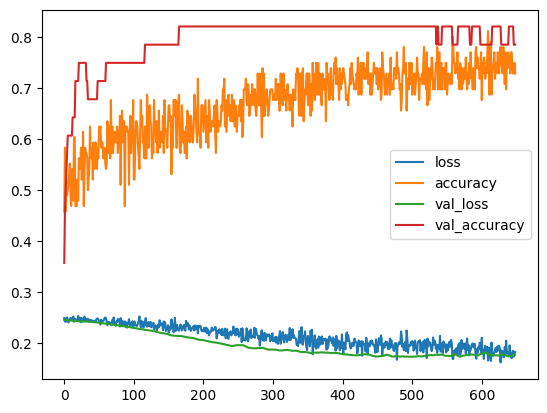

In [527]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [528]:
predictions = model.predict(X_test)
predictions[:5]

1/1 [==============================] - 0s 95ms/step


array([[0.7020188 ],
       [0.        ],
       [0.69112927],
       [0.47730494],
       [0.71283966]], dtype=float32)

In [529]:
# pasar predictions a 0-1
#predictions = predictions > 0.5
from sklearn.preprocessing import binarize

predictions=binarize(predictions, threshold=0.5)
predictions[:5]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [530]:
#Resultados
clases = [0, 1]

array_clase_test=np.array(y_test)
# Calcular y mostrar la matriz de confusión
cnf_matrix = confusion_matrix(array_clase_test, predictions)
print("Confusion Matrix:\n", cnf_matrix)

# Calcular y mostrar el reporte de clasificación
report = classification_report(array_clase_test, predictions)
print("\nClassification Report con SMOT 10 var originales:\n", report)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(array_clase_test, predictions)
print("\nAccuracy:\n", accuracy)

Confusion Matrix:
 [[ 7  4]
 [ 2 15]]

Classification Report con SMOT 10 var originales:
               precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.79      0.88      0.83        17

    accuracy                           0.79        28
   macro avg       0.78      0.76      0.77        28
weighted avg       0.78      0.79      0.78        28


Accuracy:
 0.7857142857142857
